In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:Datasets/placementdata.csv', index_col = 'StudentID')
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 937.5+ KB


In [5]:
df.isna().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [7]:
df['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

In [8]:
df['ExtracurricularActivities'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['PlacementTraining'].unique()

array(['No', 'Yes'], dtype=object)

converting Yes/No and Placed/NotPlaced to 1/0

In [10]:
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed':1, 'NotPlaced':0})

In [11]:
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes':1, 'No':0})

In [12]:
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes':1, 'No':0})

In [13]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9998,8.4,1,3,0,70,4.8,1,1,79,81,1


In [14]:
x =  df.drop('PlacementStatus', axis = 1)
y = df['PlacementStatus']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9998,8.4,1,3,0,70,4.8,1,1,79,81,1


In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
prediction = model.predict(x_test)

In [111]:
print(f'Accuracy: {accuracy_score(y_test, prediction)}')

Accuracy: 0.8135


In [22]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, prediction)}')

Confusion Matrix:
 [[983 186]
 [187 644]]


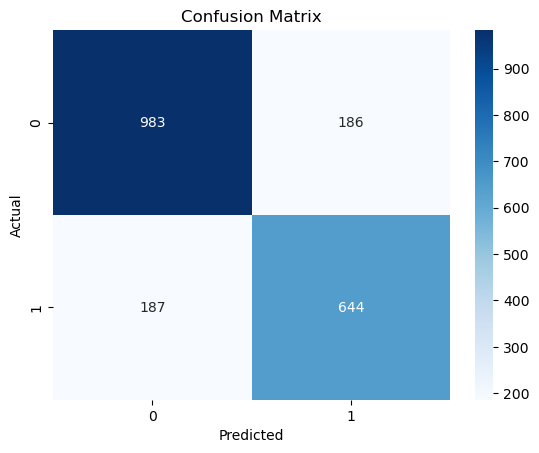

In [23]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
print(f'Classification Report:\n\n {classification_report(y_test, prediction)}')

Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1169
           1       0.78      0.77      0.78       831

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [97]:
features = x.columns
coefficients = model.coef_[0]

In [98]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': coefficients}).sort_values(by = 'Importance', ascending = False)

In [99]:
importance_df

,Feature,Importance
4,AptitudeTestScore,0.582010
7,PlacementTraining,0.379063
6,ExtracurricularActivities,0.344065
8,SSC_Marks,0.301272
5,SoftSkillsRating,0.286184
9,HSC_Marks,0.241728
2,Projects,0.241568
0,CGPA,0.225483
3,Workshops/Certifications,0.145147
1,Internships,-0.021146


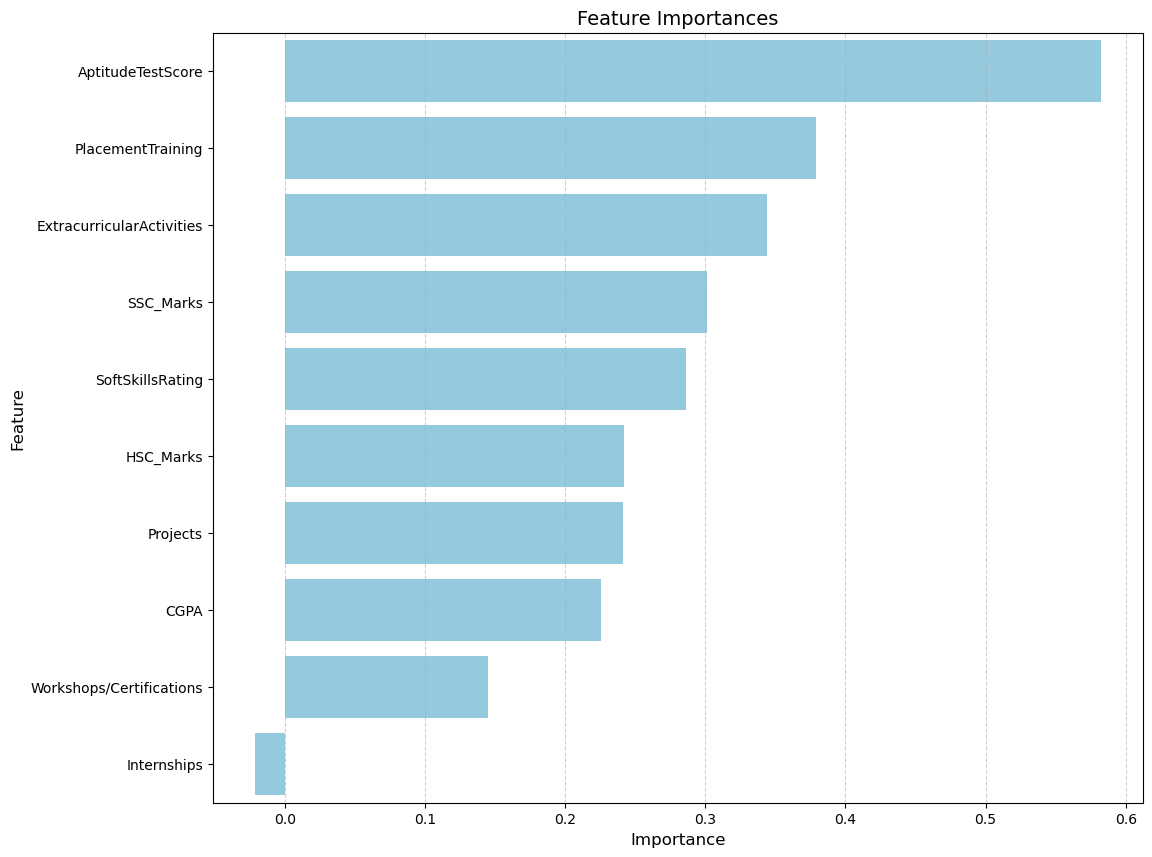

In [102]:
plt.figure(figsize=(12, 10))
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df, color = 'skyblue')
plt.title('Feature Importances', fontsize = 14)
plt.xlabel('Importance', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.6) 

plt.show()

In [84]:
import numpy as np

# New sample features [CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities, PlacementTraining, SSC_Marks, HSC_Marks]
new_sample = np.array([[7.5, 1, 1, 1, 65, 4.4, 0, 0, 61, 79]])

# Scale it using the same scaler used during training
new_sample_scaled = scaler.transform(new_sample)

# Predict placement
predicted_class = model.predict(new_sample_scaled)[0]
predicted_prob = model.predict_proba(new_sample_scaled)[0][1]  # probability of being placed

# Output
print("Prediction for the new candidate:")
print("Placement Status:", "Placed" if predicted_class == 1 else "Not Placed")
print("Probability of Getting Placed:", round(predicted_prob * 100, 2), "%")

Prediction for the new candidate:
Placement Status: Not Placed
Probability of Getting Placed: 4.31 %
